In [1]:
#install libraries
!pip install feature_engine

  Obtaining dependency information for feature_engine from https://files.pythonhosted.org/packages/62/60/77fcc9d3cfaabab34027aa8ea0025c5e2d4cf9561fa9725a38f0785b43aa/feature_engine-1.6.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library to turn of warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### The goal of this analysis, is to make a model that can accurately predicts the sale price of houses, given it's features.

In [3]:
train_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
#let's change the train_set name to 'df' to ease us in calling the train set (it's better than typing 'train_set' all the time)
df = train_set.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#let's drop the 'id' column since it doesn't contains any information 
df.drop('Id', axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA + Preprocessing

In [6]:
#check the shape/dimension of our dataset
df.shape

(1460, 80)

In [7]:
#check the dtypes of our dataset
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [8]:
#run this cell so we can see all the rows, that are changed to '. . .' in jupyter notebook, due to the printing limitation 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
#check the dtypes again of our dataset
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [10]:
#Descriptive statistic of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


#### Some of the variables, have count less than the rows we obtained from 'df.shape', which is 1460, which indicates missing values. some of the variables also has a suspicious range of their 'min' and 'max', which can also indicates outliers.

In [11]:
#Descriptive statistic of categorical variables
df.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


#### Lots of variables has a lot of missing value, as we can see from their 'count'. Some also has a very high 'frequency' which can indicate low variance / almost constant.

In [12]:
#Check missing value
mis_val = df.isnull().sum()
mis_val = mis_val[mis_val > 0]
print("Features with missing values:")
print(mis_val)

Features with missing values:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


#### As we can see, it turns out to be true that some of the variables have lots of missing value.

## Handling Missing Values

#### Before we do any feature analysis, i would like to impute some of the missing values first with 'None', why 'None'? well as the data card suggests, some of the missing value basically means that a feature is not available, e.g : NA in 'Alley' means 'No alley access'.

In [13]:
#impute missing value with 'None'
nones = ['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
   ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for column in nones:
    df[column] = df[column].fillna("None")

In [14]:
#Check missing value again
mis_val = df.isnull().sum()
mis_val = mis_val[mis_val > 0]
print("Features with missing values:")
print(mis_val)

Features with missing values:
LotFrontage    259
MasVnrType     872
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64


#### Ok, so we need to impute the rest of features with missing values with no meaning, the strategy here is to impute continuous variables with knn imputer, and the categorical with mode.

#### Why knn imputer? well the size of our data is relatively small. therefore, running a knn imputer won't be computanionally expensive for this size of data.

In [15]:
from sklearn.impute import KNNImputer
knn_cols = ['LotFrontage','MasVnrArea','GarageYrBlt']
imputer = KNNImputer(weights = 'distance')
df[knn_cols] = imputer.fit(df[knn_cols])

In [16]:
#Since 'Electrical' is categorical, we will use it's mode for imputation.
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode().iloc[0])

In [17]:
#Drop 'MasVnrType', because it's total of missing value is more than 50%, imputing it can cause a highly bias value.
df.drop('MasVnrType', axis = 1, inplace = True)

#### Let's see the unique contents of our features 

In [18]:
#List our continuous columns
cont_col = ['SalePrice', 'ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea', 'GarageYrBlt','GrLivArea'
            ,'LowQualFinSF','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1','MasVnrArea'
            ,'YearRemodAdd','YearBuilt','LotFrontage','MiscVal','MoSold','YrSold','PoolArea','3SsnPorch','TotRmsAbvGrd']

for x in df.columns:
    if x in cont_col:
        continue
    
    print(x)
    print(df[x].unique())

MSSubClass
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
LotArea
[ 8450  9600 11250 ... 17217 13175  9717]
Street
['Pave' 'Grvl']
Alley
['None' 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual
[ 7  6  8  5  9  4 10  3  1  2]
OverallCo

#### Since we have lots of features, it's best if we first see the correlation between our features and the target value (SalePrice), to actually see which features impact our target the most.

In [19]:
num_df = df.select_dtypes(include='number')
correlation_with_y = num_df.corr()['SalePrice'].sort_values(ascending=False)
print(correlation_with_y)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


#### As we can observe, we have 10 variables that have more than 50% correlation to the target (excluding 'SalePrice'), and we also have lots of variables which are negatively correlated to the target.

## 'SalePrice' (target variable) Analysis

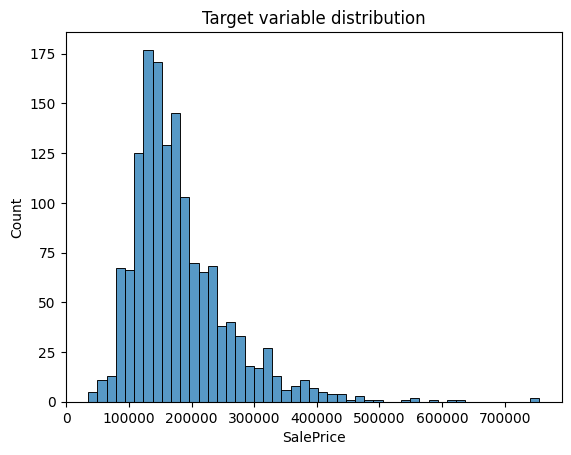

Original skewness of our data :  1.880940746034036


In [20]:
#simply plot the distribution of the 'SalePrice'
from scipy.stats import skew

sns.histplot(df['SalePrice'])
plt.title("Target variable distribution")
plt.show()

print("Original skewness of our data : ", skew(df['SalePrice']))

#### It is highly skewed, we can try variable transformation methods to see which method works the best.

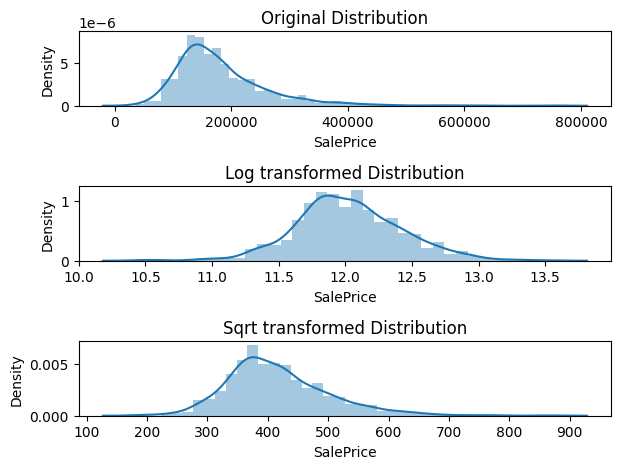

Skewness after log transformation :  0.12122191311528363
Skewness after sqrt transformation :  0.9421834681211159


In [21]:
#Let's try some methods and compare the result

#log transformation
trans1 = np.log1p(df['SalePrice'])

#sqrt transformation
trans2 = np.sqrt(df['SalePrice'])

fig,axes = plt.subplots(nrows = 3, ncols = 1)
sns.distplot(df['SalePrice'], ax = axes[0])
sns.distplot(trans1, ax = axes[1])
sns.distplot(trans2, ax = axes[2])

axes[0].set_title('Original Distribution')
axes[1].set_title('Log transformed Distribution')
axes[2].set_title('Sqrt transformed Distribution')

plt.tight_layout()
plt.show()

print("Skewness after log transformation : ",skew(trans1))
print("Skewness after sqrt transformation : ",skew(trans2))

#### From the transformations above, we can conclude that logarithmic transformation can fix the skewness in our dependent variable better than sqrt transformation. We should use the log transformed target for modelling.

#### but why do we need to fix the skewness in our target variable? it's simply because with a skewed target, our model can underfit for datapoints at the tail where datapoints are'nt as frequent as at is in the median.

## 'OverallQual' Analysis

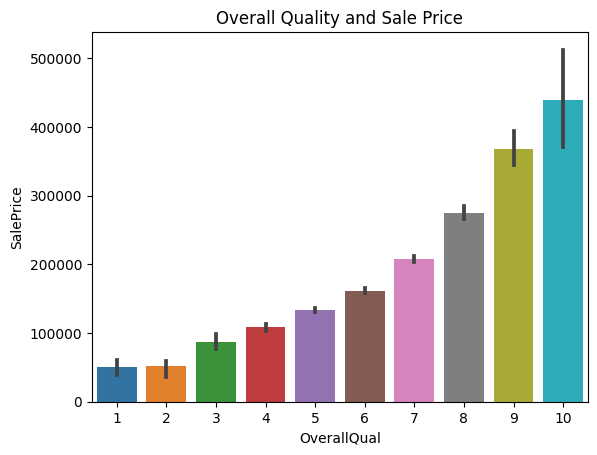

In [22]:
sns.barplot(x = df['OverallQual'], y = df['SalePrice'])
plt.title("Overall Quality and Sale Price")
plt.show()

#### We can see a trend in here that higher 'OverallQual' leads to a higher 'SalePrice'

## 'GrLivArea'(Ground Living Area) Analysis

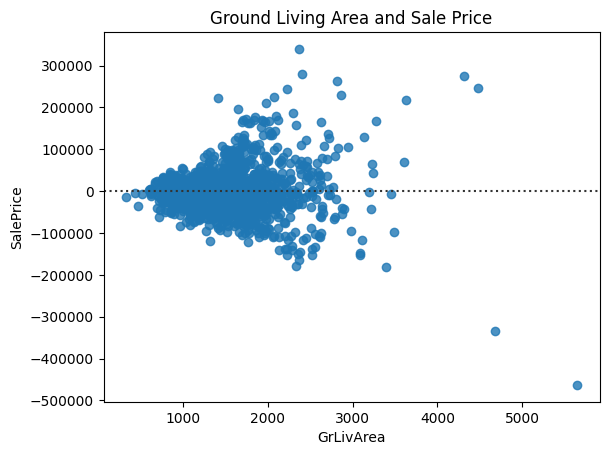

In [23]:
#Let's create a residual plot to see, if our data fits a linear model.
# A residual is a measure of how far away a point is vertically from the regression line.

sns.residplot(x = df['GrLivArea'], y = df['SalePrice'])
plt.title("Ground Living Area and Sale Price")
plt.show()

#### The residual plot looks heteroscedastic (cone shaped) and it also contains outliers which could indicate that our dataset is not a good candidate for regression models, however let's look at another continuous variables' residual plot.

#### What could indicate a good linear relationship is If the residuals are equally and randomly spaced around the horizontal axis, and the spread of residuals is roughly constant across all levels of the independent variable, a linear regression model is a good choice. which is the case for homoscedasticity.

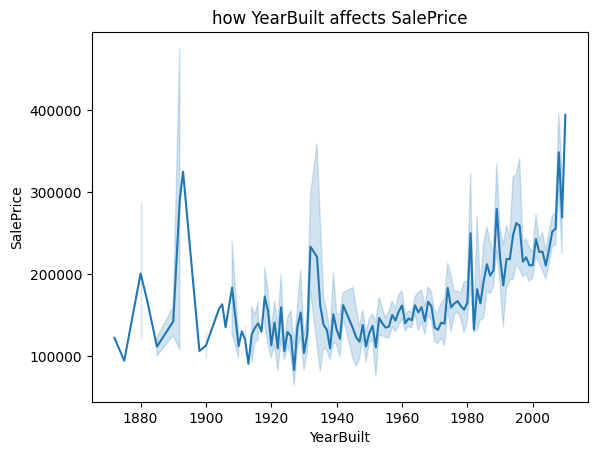

In [24]:
sns.lineplot(x = df['YearBuilt'], y = df['SalePrice'],)
plt.title("how YearBuilt affects SalePrice")
plt.show()

#### As we can see, houses built after 1980 tends to have higher sale price.

## 'GarageCars' Analysis

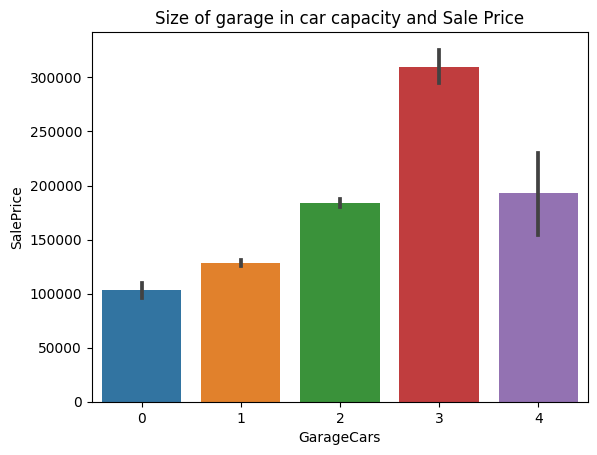

In [25]:
sns.barplot(x = df['GarageCars'], y = df['SalePrice'])
plt.title("Size of garage in car capacity and Sale Price")
plt.show()

#### As we can observe, up to 3 GarageCars have a positive correlation with SalePrice, but 4 somehow is worse than 3 GarageCars.

## 'GarageArea' Analysis

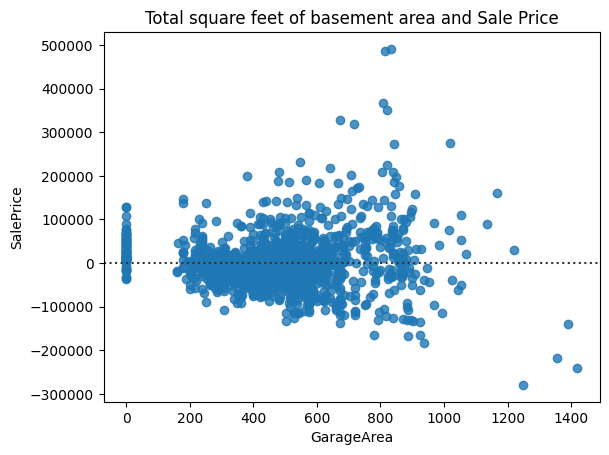

In [26]:
sns.residplot(x = df['GarageArea'], y = df['SalePrice'])
plt.title("Total square feet of basement area and Sale Price")
plt.show()

#### As we can see, the residuals also violates the rule of  homoscedasticity, which could indicates violation of an assumpation of linear regression.

## 'TotalBsmtSF' (Total square feet of basement area) Analysis

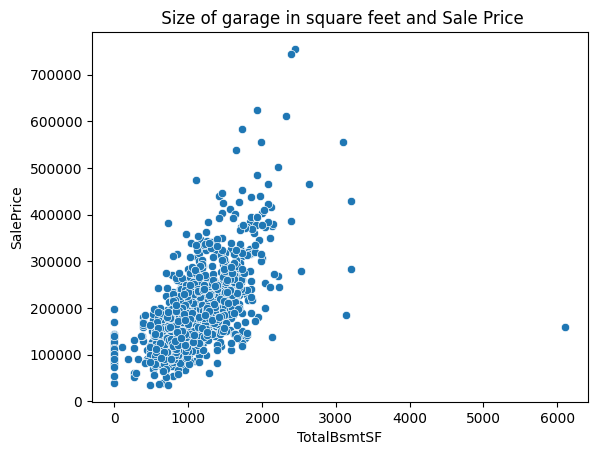

In [27]:
sns.scatterplot(x = df['TotalBsmtSF'], y = df['SalePrice'])
plt.title(" Size of garage in square feet and Sale Price")
plt.show()

## OverallQual' and 'OveralCond' Analysis

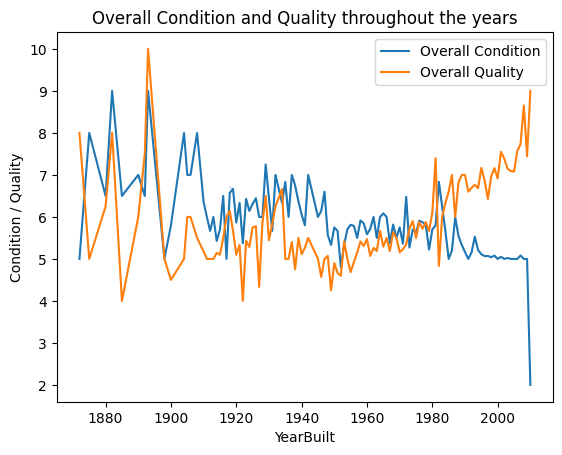

In [28]:
#Let's see how 'OverallQual' and 'OveralCond' differs, since higher condition could also mean higher quality.
sns.lineplot(data=df, x='YearBuilt', y='OverallCond', ci=False, label='Overall Condition')
sns.lineplot(data=df, x='YearBuilt', y='OverallQual', ci=False, label='Overall Quality')

plt.title('Overall Condition and Quality throughout the years')
plt.ylabel("Condition / Quality")
plt.legend()
plt.show()

#### Turns out that overallCond and overallQual doesn't represent one another very well, as the lines can be easily distinguished from each other, therefore, we will be using both of them.

## 'Street' (Type of road access) Analysis

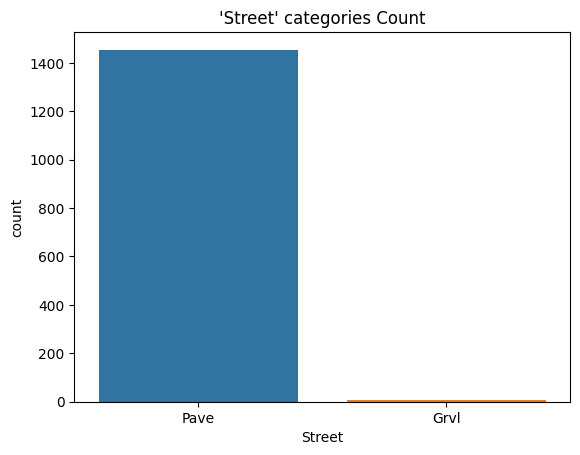

In [29]:
sns.countplot(x = df['Street'])
plt.title("'Street' categories Count")
plt.show()

#### Since this feature is highly/quasi constant which indicates that , we should drop it. Why? highly constant features mean that we have little to no information to gain from it.

In [30]:
df.drop('Street', axis = 1, inplace = True)

## Univariate Outlier Analysis

In [31]:
#Univariate outlier analysis using IQR for numerical data
#for numerical data, it is better to use IQR method, since we have lots of skewed data.

#IQR = Q3 - Q1
#lower = Q1 - 1.5 IQR
#Upper = Q3 + 1.5 IQR

num_df = df.select_dtypes(include=['number'])
target = num_df['SalePrice']
num_df.drop('SalePrice', axis = 1, inplace = True)
temp_dict = []

for var in num_df:
    q1 = num_df[var].quantile(0.25)
    q3 = num_df[var].quantile(0.75)
    iqr = q3-q1
    
    outliers = num_df[var][((num_df[var] < (q1 - iqr*1.5)) | (num_df[var] > (q3+1.5*iqr)) )]
    
    outliers_dict = {'features' : var, 'outlier count' : len(outliers)}
    temp_dict.append(outliers_dict)

uni_outlier_df = pd.DataFrame.from_dict(temp_dict)
print('Univariate outlier analysis :')
uni_outlier_df = uni_outlier_df[uni_outlier_df['outlier count'] > 0]
uni_outlier_df

Univariate outlier analysis :


,features,outlier count
0,MSSubClass,103
1,LotArea,69
2,OverallQual,2
3,OverallCond,125
4,YearBuilt,7
6,BsmtFinSF1,7
7,BsmtFinSF2,167
8,BsmtUnfSF,29
9,TotalBsmtSF,61
10,1stFlrSF,20


#### As we can see, we have lots of outliers, but we won't remove/impute it because we will be using tree algorithms/models which are robust to outliers.

# Feature Engineering + Feature Selection

#### Before we proceed with feat eng and feat sel, it is a good practice to first split our dataset, so we won't have any information leak from our train to test set.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis = 1),
                                                           trans1, test_size= 0.31,
                                                           random_state = 42)

## Quasi Constant / Highly Constant Features Selection

#### To save time we should implement a library to help us drop all the features that are highly constant, rather than checking all the features one by one.

In [33]:
from feature_engine.selection import DropConstantFeatures

In [34]:
#Build the selector
sel = DropConstantFeatures(tol = 0.98)
sel.fit(X_train)

DropConstantFeatures(tol=0.98)

In [35]:
print("Highly constant features :")
sel.features_to_drop_

Highly constant features :


['LotFrontage',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'MasVnrArea',
 'LowQualFinSF',
 'GarageYrBlt',
 '3SsnPorch',
 'PoolArea',
 'PoolQC']

In [36]:
#Drop those highly constant features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

## Encodings

In [37]:
#in here, we need to create lists of ordinal variables based on their ranking, so we can fit the to our encoder
ordinal = ['Fence', 'GarageCond', 'GarageQual', 'GarageFinish','FireplaceQu','KitchenQual','HeatingQC','BsmtFinType2',
           'BsmtFinType1','BsmtExposure','BsmtCond', 'BsmtQual','ExterCond',
          'ExterQual']
nominal = ['MSZoning','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1',
          'BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','Foundation','Heating',
          'CentralAir','Electrical','Functional','GarageType','PavedDrive','MiscFeature','SaleType','SaleCondition']

#### We will use mean encoding for nominal categorical and ordinal encoder for ordinal categorical, to prevent curse of dimensionality and overfitting.

In [38]:
from category_encoders import OrdinalEncoder
ord_enc = OrdinalEncoder(cols = ordinal)

In [39]:
X_train = ord_enc.fit_transform(X_train, y_train)
X_test = ord_enc.transform(X_test, y_test)

In [40]:
from category_encoders import cat_boost
enc = cat_boost.CatBoostEncoder(cols = nominal, random_state = 42)

In [41]:
X_train = enc.fit_transform(X_train, y_train)
X_test = enc.transform(X_test, y_test)

## Model Selection

#### Let's test random forest against 2 boosting algorithms, random forest is known for it's robustness, while boosting algorithms are known for how well they performs at competitions

In [42]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

#We will do cross-validation with Kfold to choose our model.
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

#make list of model
models = [('XGBoost Regressor', XGBRegressor()),
          ('Random Forest', RandomForestRegressor()),
          ('CatBoost Regressor', CatBoostRegressor(silent=True)),
          ('LGBM Regressor', LGBMRegressor()),
          ('Support Vector Regressor', SVR())]

#Kfold with cross_val_score
model_name = []
model_res = []

for name,model in models :
    scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'neg_root_mean_squared_error')
    model_name.append(name)
    model_res.append(np.abs(scores))

df_res = pd.DataFrame(model_res, index = model_name)
df_res = df_res.transpose()
print(df_res)
df_res.mean()

   XGBoost Regressor  Random Forest  CatBoost Regressor  LGBM Regressor  \
0           0.181438       0.175264            0.140510        0.154062   
1           0.150049       0.155096            0.127418        0.137865   
2           0.161665       0.174560            0.148297        0.160738   
3           0.137624       0.127982            0.113204        0.128753   
4           0.164462       0.149433            0.115592        0.143644   

   Support Vector Regressor  
0                  0.239062  
1                  0.203808  
2                  0.233564  
3                  0.182373  
4                  0.210895  


XGBoost Regressor           0.159048
Random Forest               0.156467
CatBoost Regressor          0.129004
LGBM Regressor              0.145012
Support Vector Regressor    0.213940
dtype: float64

#### Because we use tree algorithm for our modelling, we don't need to scale the continuous features, but let's try to compare the performance of our model with scaled and unscaled continuous features.

## Scaled vs unscaled comparison

In [43]:
#we will use robust scaler because of the nature of our data which has many outliers on it's features.
cont_col = [ 'ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'GarageArea','GrLivArea'
            ,'2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2', 'BsmtFinSF1'
            ,'YearRemodAdd','YearBuilt','MiscVal','MoSold','YrSold','TotRmsAbvGrd']


from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = X_train.copy()
X_train_scaled[cont_col] = scaler.fit_transform(X_train_scaled[cont_col])

model_name_scaled = []
model_res_scaled = []

for name,model in models :
    scores = cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring = 'neg_root_mean_squared_error')
    model_name_scaled.append(name)
    model_res_scaled.append(np.abs(scores))

df_res_scaled = pd.DataFrame(model_res_scaled, index = model_name_scaled)
df_res_scaled = df_res_scaled.transpose()
print(df_res_scaled)
df_res_scaled.mean()

   XGBoost Regressor  Random Forest  CatBoost Regressor  LGBM Regressor  \
0           0.181438       0.172676            0.140506        0.154768   
1           0.150049       0.155296            0.127417        0.135273   
2           0.161665       0.170592            0.148297        0.159582   
3           0.137624       0.128997            0.113193        0.128494   
4           0.164462       0.148149            0.115583        0.142983   

   Support Vector Regressor  
0                  0.351687  
1                  0.333282  
2                  0.367989  
3                  0.334115  
4                  0.358348  


XGBoost Regressor           0.159048
Random Forest               0.155142
CatBoost Regressor          0.128999
LGBM Regressor              0.144220
Support Vector Regressor    0.349084
dtype: float64

#### As we can see, there is no signifcant change to our model performance, therefore we won't scale our continuous features.

In [44]:
#Import metrics library
from sklearn.metrics import mean_squared_error

#### Since Cat Boost Regressor performs the best, we should make a baseline model with it, and tune the hyperparameter afterward.

In [45]:
model = CatBoostRegressor(silent=True)
model.fit(X_train,y_train)
pred = model.predict(X_test)
res = mean_squared_error(y_test,np.exp(pred), squared = False)
print('result : ', res)

result :  181511.1418646442


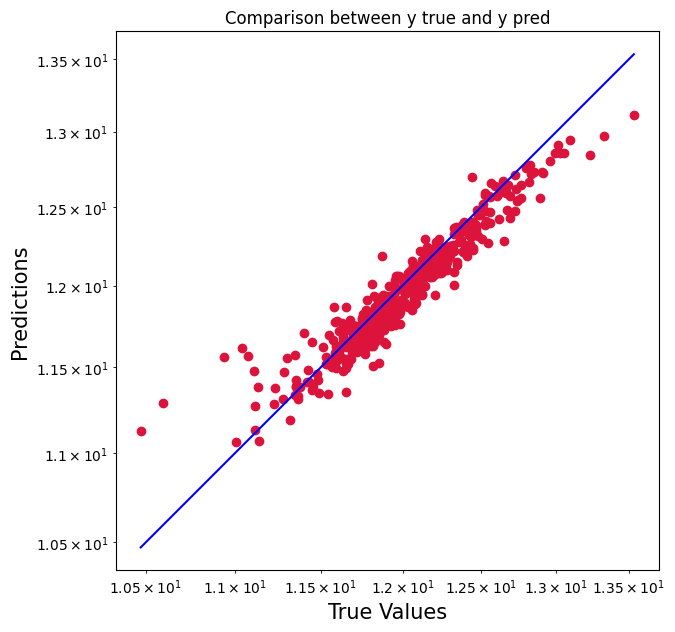

In [46]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p2, p1], [p2, p1], 'b-')  # Corrected order of points
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Comparison between y true and y pred")
plt.show()

#### As we can see, our model seems to perform well, regarding that the blue line represents the perfect regression line, although some predictions fall quite far from the regression line.

In [47]:
#Hyper parameter optimization
rand_params = {
    'iterations' : [90,130,160,190,220],
    'learning_rate' : [0.01,0.03,0.05,0.07,0.11],
    'depth' : [1,3,5,9,11],
}
kfold = KFold(n_splits = 3, shuffle = True, random_state = 42)

## Hyperparameter Tuning with GridSearch

In [48]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model,  rand_params,  scoring = 'neg_root_mean_squared_error',  cv = kfold, error_score='raise')

In [49]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             error_score='raise',
             estimator=<catboost.core.CatBoostRegressor object at 0x77ff26817790>,
             param_grid={'depth': [1, 3, 5, 9, 11],
                         'iterations': [90, 130, 160, 190, 220],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.11]},
             scoring='neg_root_mean_squared_error')

In [50]:
grid_search.best_params_

{'depth': 5, 'iterations': 220, 'learning_rate': 0.07}

In [51]:
tuned_model_grid = CatBoostRegressor(**grid_search.best_params_, silent = True)
tuned_model_grid.fit(X_train,y_train)
another_pred = np.exp(tuned_model_grid.predict(X_test))
res = mean_squared_error(y_test,another_pred, squared = False)
print('result : ', res)

result :  180139.99510235494


#### Compared to our previous non-tuned model's performance, there is a slight improvment.

#### Let's try to do feature selection using the model's feature_importance_

In [52]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(tuned_model_grid,importance_getter='feature_importances_')

In [53]:
sel.fit(X_train,y_train)

selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)

15

In [54]:
#let's create a new model using only the selected features
tuned_model_selfeat = CatBoostRegressor(**grid_search.best_params_, silent = True)
tuned_model_selfeat.fit(X_train[selected_feat],y_train)
another_pred = np.exp(tuned_model_selfeat.predict(X_test[selected_feat]))
res = mean_squared_error(y_test,another_pred, squared = False)
print('result : ', res)

result :  186466.82143977538


#### As we observe, our model's performance decreased .5 out of it's original tuned performance. Therefore, we will not use the selected features.

In [55]:
model = CatBoostRegressor(**grid_search.best_params_, silent = True)
model.fit(X_train,y_train)
pred = model.predict(X_test)
res = mean_squared_error(y_test,pred, squared = False)
print('result : ', res)

result :  0.1408038791560392


## Final Model

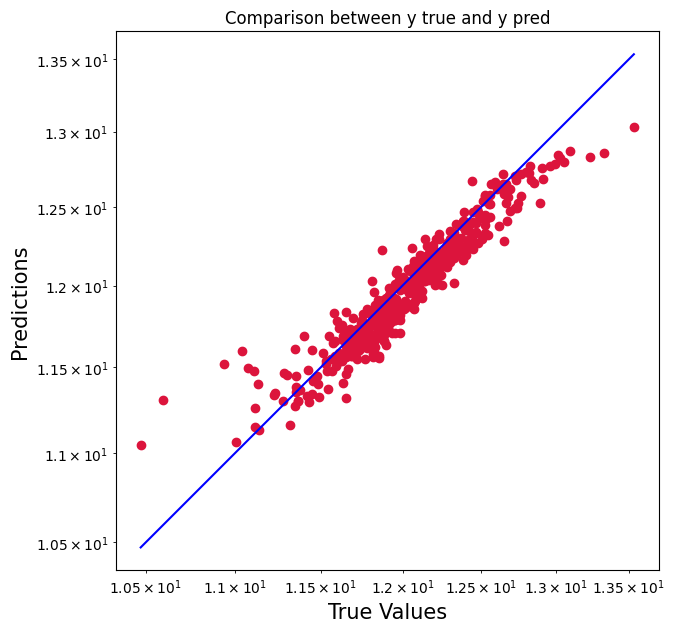

In [56]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p2, p1], [p2, p1], 'b-')  # Corrected order of points
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title("Comparison between y true and y pred")
plt.show()

## Conclusion

#### We've managed to create a decent model to predict houses' sales price with RMSE score of 186072.66. Based on the visualization, our model has lots of underprediction(predict below the real value) compared to overprediction.

## Submission to kaggle

#### We only need to apply the same steps (feature engineering, preprocessing, etc) that we applied to the train set, to the test set which will be used to make predictions for submission to kaggle.

In [57]:
test_set = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
#save the test's 'Id' for submission later.
test_id = test_set.Id

In [58]:
test_set.drop('Id',axis = 1, inplace = True)

In [59]:
#Check missing values
mis_val = test_set.isnull().sum()
mis_val = mis_val[mis_val > 0]
print("Features with missing values:")
print(mis_val)

Features with missing values:
MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [60]:
#impute missing values with 'None'
for column in nones:
    test_set[column] = test_set[column].fillna("None")

In [61]:
#Check missing values again
mis_val = test_set.isnull().sum()
mis_val = mis_val[mis_val > 0]
print("Features with missing values:")
print(mis_val)

Features with missing values:
MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType      894
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageYrBlt      78
GarageCars        1
GarageArea        1
SaleType          1
dtype: int64


#### Fill missing values accordingly.

In [62]:
#Impute missing continuous features with knn
knn_cols = ['LotFrontage','MasVnrArea','GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageYrBlt','GarageArea']
test_set[knn_cols] = imputer.fit_transform(test_set[knn_cols])

#Impute missing categorical features with mode value
test_set.MSZoning = test_set.MSZoning.fillna(test_set.MSZoning.mode().iloc[0])
test_set.Utilities = test_set.Utilities.fillna(test_set.Utilities.mode().iloc[0])
test_set.Exterior1st = test_set.Exterior1st.fillna(test_set.Exterior1st.mode().iloc[0])
test_set.Exterior2nd = test_set.Exterior2nd.fillna(test_set.Exterior2nd.mode().iloc[0])
test_set.BsmtFullBath = test_set.BsmtFullBath.fillna(test_set.BsmtFullBath.mode().iloc[0])
test_set.BsmtHalfBath = test_set.BsmtHalfBath.fillna(test_set.BsmtHalfBath.mode().iloc[0])
test_set.KitchenQual = test_set.KitchenQual.fillna(test_set.KitchenQual.mode().iloc[0])
test_set.Functional = test_set.Functional.fillna(test_set.Functional.mode().iloc[0])
test_set.GarageCars = test_set.GarageCars.fillna(test_set.GarageCars.mode().iloc[0])
test_set.SaleType = test_set.SaleType.fillna(test_set.SaleType.mode().iloc[0])

#Drop 'MasVnrType', because it's total of missing value is more than 50%, imputing it can cause a highly bias value.
test_set.drop('MasVnrType', axis = 1, inplace = True)

In [63]:
#Check missing values again
mis_val = test_set.isnull().sum()
mis_val = mis_val[mis_val > 0]
print("Features with missing values:")
print(mis_val)

Features with missing values:
Series([], dtype: int64)


#### Feat Selection +  Feat Eng

In [64]:
#Drop constant features
test_set.drop(['LotFrontage',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'MasVnrArea',
 'LowQualFinSF',
 'GarageYrBlt',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Street'], axis = 1, inplace = True)

In [65]:
#Encode nominal and ordinal categorical features
test_set = ord_enc.transform(test_set)
test_set = enc.transform(test_set)

In [66]:
#predict and make the submission file
final_pred = np.exp(tuned_model_grid.predict(test_set))
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = final_pred
sub.to_csv('Submission.csv', index = False)